In [125]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

# Làm sạch dữ liệu

In [126]:
# Đọc file CSV vào dataframe
df = pd.read_csv('data0205.csv')

# Xóa các dòng trùng nhau dựa trên cột "link"
df.drop_duplicates(subset=['link'], inplace=True)

# Lưu lại vào file CSV
df.to_csv('data_done.csv', index=False)

In [127]:
df = pd.read_csv("data_done.csv")

# Tạo đặc trưng mới

In [128]:
df["herald_difference"] = df["blue_heralds"] - df["red_heralds"]
df["dragon_difference"] = df["dragon_blue"] - df["dragon_red"]
df["turret_difference"] = df["turret_blue"] - df["turret_red"]

df["kda_difference_top"] = df["kda_top_blue"] - df["kda_top_red"]
df["kda_difference_jungle"] = df["kda_jungle_blue"] - df["kda_jungle_red"]
df["kda_difference_mid"] = df["kda_mid_blue"] - df["kda_mid_red"]
df["kda_difference_ad"] = df["kda_ad_blue"] - df["kda_ad_red"]
df["kda_difference_sp"] = df["kda_sp_blue"] - df["kda_sp_red"]

# Xóa các cột không cần thiết

In [129]:
df = df.drop(['kda_top_blue', 'kda_top_red', 'kda_jungle_blue', 'kda_jungle_red', 'kda_mid_blue', 'kda_mid_red', 'kda_ad_blue', 'kda_ad_red', 'kda_sp_blue', 'kda_sp_red',
              'link','dragon_blue', 'dragon_red', 'turret_blue', 'turret_red', 'blue_heralds', 'red_heralds','top_blue','top_red', 'mid_blue', 'mid_red','jung_blue','jung_red','ad_blue','ad_red','support_blue','support_red'], axis=1)
df['team_win'] = df['team_win'].replace({'blue': 1, 'red': 0})
df.to_csv("processed_data.csv", index=False)

dt = df.head(1000)
dt.to_csv("processed_data_1ksamples.csv", index=False)


In [130]:
data = pd.read_csv("processed_data.csv")

In [131]:
# Tách dữ liệu thành tập X và tập y
X = data.drop('team_win', axis=1)
y = data['team_win']

In [132]:
# Khởi tạo cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [133]:
# Standardization techniques
scalers = [MinMaxScaler(), MaxAbsScaler(), StandardScaler(), RobustScaler(), Normalizer(), QuantileTransformer(), PowerTransformer()]

In [134]:
models = [        LogisticRegression(random_state=42),        DecisionTreeClassifier(random_state=42),        RandomForestClassifier(random_state=42),        KNeighborsClassifier(),        GaussianNB(),        SVC(random_state=42),        MLPClassifier(random_state=42),        GradientBoostingClassifier(random_state=42),        AdaBoostClassifier(random_state=42),        BaggingClassifier(random_state=42),        LinearDiscriminantAnalysis(),    XGBClassifier(random_state=42)]

In [135]:
acc_scores = {type(model).__name__: [] for model in models}

In [136]:
acc_scores = {}

# Loop through models and scalers
for model in models:
    for scaler in scalers:
        acc = []
        
        # Scale the data
        X_scaled = scaler.fit_transform(X)
        
        # Loop through folds and calculate average accuracy
        for train_index, test_index in kf.split(X_scaled):
            X_train_scaled, X_test_scaled = X_scaled[train_index], X_scaled[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            # Train the model
            model.fit(X_train_scaled, y_train)
            
            # Make predictions on the testing data
            y_pred = model.predict(X_test_scaled)
            
            # Calculate the accuracy of the predictions
            acc.append(accuracy_score(y_test, y_pred))
        
        # Append the accuracy score to the list for this model and scaler
        model_name = f"{type(model).__name__} ({type(scaler).__name__})"
        acc_scores[model_name] = np.mean(acc)

# Print the results for each model and scaler
for model_name, acc in acc_scores.items():
    print(f"{model_name}: {acc*100:.4f}%")

# Find the best model and scaler
best_model_name = max(acc_scores, key=acc_scores.get)
print(f"Best model and scaler: {best_model_name}, Accuracy: {acc_scores[best_model_name]*100:.4f}%")

c:\Users\dangt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\dangt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\dangt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\dangt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

LogisticRegression (MinMaxScaler): 76.1815%
LogisticRegression (MaxAbsScaler): 76.2313%
LogisticRegression (StandardScaler): 76.1914%
LogisticRegression (RobustScaler): 76.2213%
LogisticRegression (Normalizer): 75.2343%
LogisticRegression (QuantileTransformer): 76.1815%
LogisticRegression (PowerTransformer): 76.2612%
DecisionTreeClassifier (MinMaxScaler): 67.7866%
DecisionTreeClassifier (MaxAbsScaler): 67.8365%
DecisionTreeClassifier (StandardScaler): 67.7767%
DecisionTreeClassifier (RobustScaler): 67.7966%
DecisionTreeClassifier (Normalizer): 67.0090%
DecisionTreeClassifier (QuantileTransformer): 67.6171%
DecisionTreeClassifier (PowerTransformer): 67.8166%
RandomForestClassifier (MinMaxScaler): 75.2443%
RandomForestClassifier (MaxAbsScaler): 75.2941%
RandomForestClassifier (StandardScaler): 75.3041%
RandomForestClassifier (RobustScaler): 75.2941%
RandomForestClassifier (Normalizer): 74.8056%
RandomForestClassifier (QuantileTransformer): 75.1246%
RandomForestClassifier (PowerTransforme

In [207]:
from sklearn.linear_model import LogisticRegression

# X là dữ liệu đầu vào, y là kết quả đầu ra
# train_test_split để chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình hồi quy logistic
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Đánh giá độ chính xác của mô hình trên tập kiểm tra
accuracy = lr_model.score(X_test, y_test)
print(f"Độ chính xác của mô hình trên tập kiểm tra: {accuracy*100:.4f}")

# Dự đoán tỉ lệ thắng của đội blue trong trận đấu mới
win_prob = lr_model.predict_proba(X_test)[:, 1]

# Chuyển đổi xác suất thắng thành tỉ lệ phần trăm
win_percentages = win_prob * 100

# Chuyển X_test thành DataFrame của Pandas
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Dự đoán kết quả trên tập kiểm tra
y_pred = lr_model.predict(X_test)

# Tìm các trận dự đoán sai
wrong_predictions = X_test_df[y_pred != y_test]

# Dự đoán tỉ lệ thắng của đội blue trong các trận dự đoán sai
wrong_win_prob = lr_model.predict_proba(wrong_predictions)[:, 1]

# Chuyển đổi xác suất thắng thành tỉ lệ phần trăm
wrong_win_percentages = wrong_win_prob * 100

data = []
for i in range(len(X_test)):
    data.append({
        "gold_difference": X_test_df.iloc[i]["gold_difference"],
        "herald_difference": X_test_df.iloc[i]["herald_difference"],
        "dragon_difference": X_test_df.iloc[i]["dragon_difference"],
        "turret_difference": X_test_df.iloc[i]["turret_difference"],
        "kda_difference_top": X_test_df.iloc[i]["kda_difference_top"],
        "kda_difference_jungle": X_test_df.iloc[i]["kda_difference_jungle"],
        "kda_difference_mid": X_test_df.iloc[i]["kda_difference_mid"],
        "kda_difference_ad": X_test_df.iloc[i]["kda_difference_ad"],
        "kda_difference_sp": X_test_df.iloc[i]["kda_difference_sp"],
        "blue_win_percentage": win_percentages[i],
        "red_win_percentage": 100 - win_percentages[i]
    })

# Tạo ra DataFrame từ list dict trên
df = pd.DataFrame(data)

df.to_excel('data.xlsx', index=False)

thresholds = [(0, 100), (5, 95), (10, 90), (15, 85), (20, 80), (25, 75), (30, 70), (35, 65), (40, 60), (45, 55), (50, 50)]

result_previous = 0

total_predictions = len(X_test)
results = []
for t in thresholds:
    threshold_results = len(wrong_predictions[(wrong_win_percentages < t[0]) | (wrong_win_percentages > t[1])]) 
    same_range_count = len(win_percentages[(win_percentages < t[0]) | (win_percentages > t[1])])
    if same_range_count > 0:
        error_rate = threshold_results / same_range_count
    else:
        error_rate = 0
    results.append((t[1], error_rate * 100))

df = pd.DataFrame(results, columns=["Threshold", "Error rate"])
df["Error rate"] = df["Error rate"].round(4)

print(df)

Độ chính xác của mô hình trên tập kiểm tra: 0.7687
    Threshold  Error rate
0         100      0.0000
1          95      0.4115
2          90      3.1250
3          85      5.7183
4          80      8.9404
5          75     11.6487
6          70     14.1430
7          65     15.5392
8          60     18.1050
9          55     20.5658
10         50     23.1306


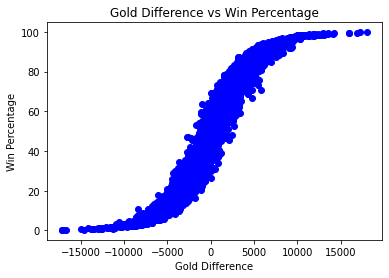

In [175]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ đường
plt.plot(X_test_df['gold_difference'], win_percentages, 'bo')

# Đặt tên cho các trục và tiêu đề
plt.xlabel('Gold Difference')
plt.ylabel('Win Percentage')
plt.title('Gold Difference vs Win Percentage')

# Hiển thị biểu đồ
plt.show()


In [181]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

Bộ tham số tốt nhất: {'C': 1438.44988828766}
Độ chính xác trên tập kiểm tra: 0.50


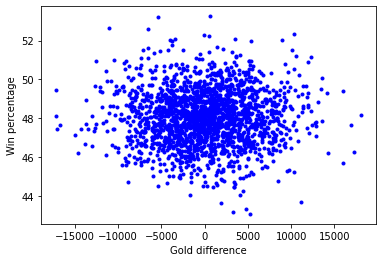

In [150]:
# Tìm bộ tham số tốt nhất cho mô hình hồi quy logistic bằng GridSearchCV
params = {"C": np.logspace(-4, 4, 20)}
lr_model = LogisticRegression(random_state=42, solver="liblinear")
grid_search = GridSearchCV(lr_model, params, cv=5, scoring="roc_auc")
grid_search.fit(X_train_scaled, y_train)

# In ra bộ tham số tốt nhất và độ chính xác trên tập kiểm tra
best_lr_model = grid_search.best_estimator_
print(f"Bộ tham số tốt nhất: {grid_search.best_params_}")
print(f"Độ chính xác trên tập kiểm tra: {best_lr_model.score(X_test_scaled, y_test):.2f}")

# Dự đoán xác suất thắng của đội blue trong trận đấu mới
win_prob = best_lr_model.predict_proba(X_test_scaled)[:, 1]

# Chuyển đổi xác suất thắng thành tỉ lệ phần trăm
win_percentages = win_prob * 100

# Vẽ biểu đồ đường gold_difference và tỉ lệ thắng
plt.plot(X_test["gold_difference"], win_percentages, "b.")
plt.xlabel("Gold difference")
plt.ylabel("Win percentage")
plt.show()

